<a href="https://colab.research.google.com/github/DianaTroinich/books/blob/master/%D0%A2%D0%B5%D1%81%D1%822_%D0%B4%D1%80%D1%83%D0%B3%D0%BE%D0%B9_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys 
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#чтение популярных
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [16]:
from nltk.corpus import stopwords
stop_w = stopwords.words('english')

In [18]:
from __future__ import division
import csv


def load_scores(filename):
    """Takes a file from the Dodd research paper and returns a dict of
    wordscores. Note this function is tailored to the file provided
    by the Dodd paper. For other sets of word scores, a dict can be
    passed directly to HMeter."""

    reader = csv.reader(open(filename, "r"), delimiter=',')
    rows = {}
    header_skipped = False
    for row in reader:
        if not header_skipped: # header first line
            header_skipped = True
            continue

        rows[row[1]] = float(row[3])

    return rows



class HMeter(object):
    """HMeter is the main class to prepare a text sample for scores. It
    expects a list of individual words, such as those provided by
    nltk.word_tokenize, as wordlist. It expects a dict of words as k and
    floating point wordscores as v for wordscores. deltah allows us to
    filter out the most neutral words as stop words."""

    def __init__(self, wordlist, wordscores, deltah=0.0):
        self.wordlist = wordlist
        self.wordscores = wordscores
        self.deltah = deltah

    _deltah = None

    @property
    def deltah(self):
        """Deltah determines stop words. The higher deltah the more neutral
        words are are discarded from the matchlist."""
        return self._deltah

    @deltah.setter
    def deltah(self, deltah):
        """Each time deltah is set we need to regenerate the matchlist."""
        self._deltah = deltah
        # TODO Should probably raise a range error if deltah is nonsensical
        # first we take every word that matches labMT 1.0
        labmtmatches = (word for word in self.wordlist
                        if word in self.wordscores)

        # then we strip out stop words as described by Dodd paper
        self.matchlist = []
        for word in labmtmatches:
            score = self.wordscores[word]
            if score >= 5.0 + self.deltah or score <= 5.0 - self.deltah:
                self.matchlist.append(word)

    def fractional_abundance(self, word):
        """Takes a word and return its fractional abundance within
        self.matchlist"""
        frac_abund = self.matchlist.count(word) / len(self.matchlist)
        return frac_abund

    def word_shift(self, comp):
        """Produces data necessary to create a word shift graph. Returns a list
        of tuples that contain each word's contribution to happiness score shift
        between two samples. So for example, assigned to a variable 'output_data'
        output_data[n] represents the data for one word where:

        output_data[n][0] the word
        output_data[n][1] the proportional contribution the word gives to overall
                          word shift
        output_data[n][2] The relative abundance of word between the two samples
        output_data[n][3] The word's happiness relative to the refernce sample

        Using this data, we can construct word shift graphs as described here:
        http://www.hedonometer.org/shifts.html"""

        # initialize variables for potentially large loop.
        # create our comparison object. self is the reference object.
        tcomp = HMeter(comp, self.deltah)

        # we want a list of all potential words, but only need each word once.
        word_shift_list = set(tcomp.matchlist + self.matchlist)

        output_data = []
        ref_happiness_score = self.happiness_score()
        comp_happiness_score = tcomp.happiness_score()
        happy_diff = comp_happiness_score - ref_happiness_score

        for word in word_shift_list:
            abundance = (tcomp.fractional_abundance(word) -
                         self.fractional_abundance(word))
            happiness_shift = self.wordscores[word] - ref_happiness_score
            paper_score = (happiness_shift * abundance * 100) / happy_diff
            output_data.append((word, paper_score, abundance, happiness_shift))

        # sort words by absolute value of individual word shift
        output_data.sort(key=lambda word: abs(word[1]))
        return output_data

    def happiness_score(self):
        """Takes a list made up of individual words and returns the happiness
        score."""

        happysum = 0
        count = len(self.matchlist)

        for word in self.matchlist:
            happysum += self.wordscores[word]

        if count != 0:  # divide by zero errors are sad.
            return happysum / count
        else:
            pass  # empty lists have no score


def main():
    s = "I love pancakes laughter and hate terrorism <HTML> zoidberg"
    scores = load_scores('/content/drive/MyDrive/data/Hedonometer.csv')
    h = HMeter(s.split(" "), scores)
    print(h.matchlist)
    print(h.happiness_score())

if __name__ == "__main__":
    main()


['love', 'pancakes', 'laughter', 'and', 'hate', 'terrorism']
5.4866666666666655


In [19]:
scores = load_scores('/content/drive/MyDrive/data/Hedonometer.csv')

In [20]:
script = open('/content/drive/MyDrive/data/csv_Alien-vs.-Predator.csv')
r_script = script.read()
r_script

'person;value\nALIENS;Vs.\nPREDATOR;Screenplay by Peter Briggs\nPREDATOR-VISION.;From their P.O.V., we see the fissure reduced to THERMAL HEAT SOURCES. The entrance registers as a black gaping void.\nPREDATOR-VISION.;"He switches through a variety of different views; infra-red, ultra- violet, enhanced motion-tracking. Nothing. He\'s so pre-occupied with this task, he totally fails to notice the skeletal ALIEN loom up behind him, emerging from the biomechanical growth on the floor. A barbed tail skewers the PREDATOR straight through the neck, splashing luminous blood across his chestplate. A gargled DEATH-RATTLE issues from his throat, the band of PREDATORS spinning around in time to see him being dragged below the ground. The band of extraterrestrial hunters have no time to come to his aid; they themselves are set upon by a half-dozen ALIEN WARRIORS. The carnage is swift and terrifying, a blur of motion. Steel blades and serrated biomechanical limbs scythe the air, alive with the CRIES

In [21]:
test_script_with_nan = pd.read_csv('/content/drive/MyDrive/data/csv_Alien-vs.-Predator.csv', sep =';')

In [40]:
test_script_with_nan.head(10)

,person,value
0,ALIENS,Vs.
1,PREDATOR,Screenplay by Peter Briggs
2,PREDATOR-VISION.,"From their P.O.V., we see the fissure reduced ..."
3,PREDATOR-VISION.,He switches through a variety of different vie...
4,CASSIE,"Ah, negative on that request commercial freigh..."
5,CASSIE (CONT'D),How's it looking? PARSONS worriedly shakes his...
6,PARSONS,"That's the second time I ran it, and it still ..."
7,CASSIE,Better tell the boss. PARSONS pulls out a coin.
8,PARSONS,Toss you for it.
9,HIROKO,Fuck! Holo off. The SWORDSMEN immediately flic...


In [23]:
print(test_script_with_nan[test_script_with_nan['value'].isnull()].count())
print(test_script_with_nan[test_script_with_nan['value'].isnull()])

person    8
value     0
dtype: int64
                                           person value
224                                        REVNA.   NaN
429                   ***** PAGE 70 MISSING *****   NaN
437                                        CLICK.   NaN
511                   ***** PAGE 84 MISSING *****   NaN
604                                      'DRIVE'.   NaN
610  POSITIVE MATCH.  COMMENCE LIFTING OPERATION.   NaN
649                                         ROAR.   NaN
656                            HIGH-PITCHED TONE.   NaN


In [24]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

In [25]:
import numpy as np

In [26]:
test_script = test_script_with_nan.dropna(axis=0)

In [27]:
num_rep = test_script.shape[0]

test_list_of_scores = []
all_ind = []
for i in test_script['value']:
    
    word_sent = tokenizer.tokenize(i)
    #print(word_sent)
    new_word = [j.lower() for j in word_sent]
    happy_rep = HMeter(new_word, scores)
    test_scores_for_rep = happy_rep.happiness_score()
    test_list_of_scores.append(test_scores_for_rep)
    #print(happy_rep.matchlist)
print(test_list_of_scores)

[4.6, 5.626666666666668, 5.070526315789473, 5.201388888888886, 5.232777777777779, 5.2700000000000005, 5.249230769230769, 5.43, 5.475, 5.314347826086958, 5.508888888888889, 5.436923076923078, 5.587999999999999, 5.43, 5.502222222222223, 5.3925, 5.241666666666667, 5.2234482758620695, 5.36375, 5.0840000000000005, 5.334666666666667, 5.225714285714285, 3.73, 5.329565217391305, 5.882857142857143, 5.766666666666666, 5.228695652173913, 5.325333333333334, 5.494827586206897, 5.438666666666667, 5.551764705882355, 5.343333333333333, 5.391249999999999, 6.053333333333334, 5.508, 5.417777777777777, 5.26, 5.456666666666667, 6.52, 5.424, 5.230588235294118, 5.33, 5.501379310344827, 5.220769230769231, 5.471428571428571, 5.663333333333333, 5.258064516129034, 5.382499999999999, 5.337017543859647, 5.848000000000001, 7.4, 5.046, 5.175897435897435, 5.22, 5.388800000000001, 5.355882352941178, 5.382857142857143, 5.2813333333333325, 5.514545454545456, 5.035454545454545, 5.275555555555557, 5.0680000000000005, 5.78

In [28]:
scale_y = [i for i in range(0, 10)]

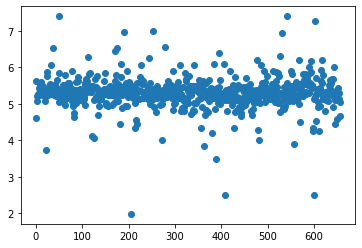

In [29]:
plt.plot(test_list_of_scores,  scaley = scale_y, marker = 'o', ls = 'None')

In [45]:
a = [1, 5, 6]
b = 6
c = [i/b for i in a]
print(c)

[0.16666666666666666, 0.8333333333333334, 1.0]


Удаление стоп слов

In [49]:
test_list_of_scores_without_stop_w = []
word_all = 0
word_count = [] 


for i in test_script['value']:
    
    word_sent = tokenizer.tokenize(i)
    
    #print(word_sent)
    new_word_without = [j.lower() for j in word_sent]
    new_word_without = [j for j in new_word_without if j not in stop_w]
    happy_rep_without = HMeter(new_word_without, scores)
    test_scores_for_rep_without = happy_rep_without.happiness_score()
    test_list_of_scores_without_stop_w.append(test_scores_for_rep_without)
    word_all += len(happy_rep_without.matchlist)
    word_count.append(word_all)
print(test_list_of_scores_without_stop_w)
script_per = [i / word_all for i in word_count]
print(script_per)

[4.6, 5.95, 4.926, 5.246217616580313, 5.130000000000001, 5.53, 5.44, 5.720000000000001, 5.42, 5.281666666666667, 5.53, 6.232, 5.24, 5.486666666666667, 6.003333333333333, 5.691428571428572, 5.188571428571428, 5.365454545454546, 5.5858823529411765, 4.52, 5.68, 4.975, 2.5, 5.367500000000001, 6.6066666666666665, 6.039999999999999, 4.815555555555556, 5.532500000000001, 5.759230769230769, 5.492500000000001, 5.677142857142857, 5.638333333333333, 5.573333333333334, 6.535, 6.38, 5.446666666666666, 5.32, 5.844444444444445, 6.52, 5.680000000000001, 5.514, 5.8, 5.756666666666668, 5.375384615384615, 5.34, 6.1899999999999995, 5.418666666666666, 5.015, 5.553478260869565, 6.49, 7.4, 4.792, 5.136923076923077, 5.2542857142857144, 5.7155555555555555, 5.433333333333334, 5.63, 5.3500000000000005, 5.812, 4.905, 5.45, 4.36, 5.926666666666667, 5.33, None, 5.3914285714285715, 5.516, 5.42, 5.014285714285714, 5.807, 5.1688888888888895, 5.086666666666667, 5.712727272727272, 5.34, None, 5.260000000000001, 4.84, 4.

In [52]:
print(len(script_per))
print(len(test_list_of_scores_without_stop_w))

657
657


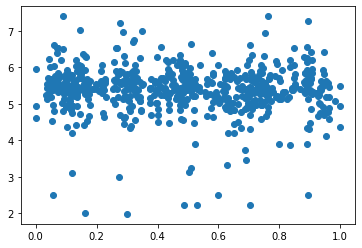

In [53]:
plt.plot(script_per, test_list_of_scores_without_stop_w,  scaley = scale_y, marker = 'o', ls = 'None')

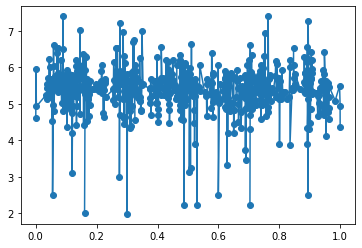

In [62]:
plt.plot(script_per, test_list_of_scores_without_stop_w,  scaley = scale_y, ls = '-', marker = 'o')

In [61]:
min(test_list_of_scores_without_stop_w, )

TypeError: ignored

In [57]:
import matplotlib.dates as mdates
x = mdates.date2num(script_per)

AttributeError: ignored

In [56]:
z = np.polyfit(x, test_list_of_scores_without_stop_w, 1)
p = np.poly1d(z)

NameError: ignored

In [ ]:
np.polyfit()

In [ ]:
plt.plot(script_per, test_list_of_scores_without_stop_w,  scaley = scale_y, ls = '-')
plt.plot(script_per, p(script_per), "r--", c = 'red')